### Import

In [7]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import researchpy as rp
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from scipy import stats
from scipy.stats import skew 
from sklearn.model_selection import train_test_split
# # machine learning library
# from sklearn.linear_model import LinearRegression
# from sklearn import svm
# # data normalization from sklearn
# from sklearn.preprocessing import MinMaxScaler
# data standardization from sklearn
from sklearn.preprocessing import StandardScaler

# KNN regressor
from sklearn.neighbors import KNeighborsRegressor

# calculate error
from sklearn.metrics import r2_score

import time

## K-Nearest Neighbours

The K-Nearest Neighbours Regression method, or KNN Regression, makes predictions based on how closely a new point resembles an existing point in the train set. For this project, we will use the built in module from SciKit Learn, KNeighborsRegressor.

### Pre-processing
We will test this method with different pre-processing on our dataset. The versions shown below are the ones that give the best accuracy (in terms of R2 score).

In [3]:
# train0
# Minimal to no preprocessing.
# Only remove null and apply one hot encoding

In [16]:
# import dataset
train0 = pd.read_csv('train.csv')

# Remove null
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train0)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train0.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train0.dropna(subset=drop, inplace=True)

# OHE
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
train0 = pd.get_dummies(train0, columns= categorical, prefix= categorical)

train0.head()

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [2]:
# train1

In [49]:
# import dataset
train1 = pd.read_csv('train.csv')

In [50]:
# Remove null
# For feature with too many missing values, remove this feature entirely.
# Set treshold to be 10% of all data points
# For feature with only a few missing values, remove that data point.

# from EDA
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train1)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train1.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train1.dropna(subset=drop, inplace=True)

train1.head()

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
# Remove highly skewed categorical variables, with one category of data occuping >= 90% of data.

categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# skewness of categorical variables
max_percent = []
catogorical_skewed=[]
for i in categorical: 
    if rp.summary_cat(train1[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train1[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))

# highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train1[i])["Percent"].max() >= 90:
        catogorical_skewed.append(i)
        print (i,"/ratio of the dominant category = ", rp.summary_cat(train1[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 15
Street /ratio of the dominant category =  0.9964
LandContour /ratio of the dominant category =  0.9015000000000001
Utilities /ratio of the dominant category =  0.9993000000000001
LandSlope /ratio of the dominant category =  0.9467
Condition2 /ratio of the dominant category =  0.9898
RoofMatl /ratio of the dominant category =  0.9818000000000001
BsmtCond /ratio of the dominant category =  0.9246
Heating /ratio of the dominant category =  0.981
CentralAir /ratio of the dominant category =  0.9495999999999999
Electrical /ratio of the dominant category =  0.9226000000000001
Functional /ratio of the dominant category =  0.9336
GarageQual /ratio of the dominant category =  0.9504
GarageCond /ratio of the dominant category =  0.9612999999999999
PavedDrive /ratio of the dominant category =  0.9372
MiscFeature /ratio of the dominant category =  0.9216


In [52]:
# Drop
for i in catogorical_skewed:
    train1.drop(columns=[i], inplace=True)

In [53]:
for i in catogorical_skewed:
    categorical.remove(i)
#skewness of categorical variables
max_percent = []
for i in categorical: 
    if rp.summary_cat(train1[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train1[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))
#highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train1[i])["Percent"].max() >= 90: 
         print (i,"/ratio of the dominant category = ", rp.summary_cat(train1[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 0


In [54]:
# One hot encoding
train1 = pd.get_dummies(train1, columns= categorical, prefix= categorical)
train1.head()

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [55]:
# Removing highly skewed continuous data
# Use interquartile range (IQR) method to remove the outliers for continuous variables with skewness value > 1

# identifying continuous variables with high skewness
continuous = ['LotArea', 'YearBuilt', 'YearRemodAdd', 
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
array1 = skew(train1[continuous])

#the top 15 features which are the most skewed
index1 = array1.argsort()[-15:][::-1]
continuous_skewed=[]
for i in index1:
    print (continuous[i],": skewness = ", array1[i])
    if array1[i]>=1:
        continuous_skewed.append(continuous[i])

MiscVal : skewness =  24.732979451706033
PoolArea : skewness =  14.342881566937836
LotArea : skewness =  12.025446327344339
LowQualFinSF : skewness =  10.66505349858299
3SsnPorch : skewness =  9.96262046395852
KitchenAbvGr : skewness =  5.129053439295553
BsmtFinSF2 : skewness =  4.174330005566947
ScreenPorch : skewness =  3.967379533802487
BsmtHalfBath : skewness =  3.89811918894981
EnclosedPorch : skewness =  3.214887613130617
MasVnrArea : skewness =  2.588332838278803
OpenPorchSF : skewness =  2.2638025759950504
BsmtFinSF1 : skewness =  1.6941364533315026
TotalBsmtSF : skewness =  1.6330286577439608
WoodDeckSF : skewness =  1.5027101898713007


In [56]:
print('train1 shape\t\t:',train1.shape)
# calculate interquartile range
q25, q75 = train1[continuous_skewed].quantile(0.25), train1[continuous_skewed].quantile(0.75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

train1_iqr = train1[~((train1>upper)).any(axis=1)]
print('train1_iqr shape\t:', train1_iqr.shape)

train1 shape		: (1370, 248)
train1_iqr shape	: (688, 248)


In [57]:
#calculating skewness of continuous variables
array = skew(train1_iqr[continuous])
#the top 3 features which are the most skewed
print('Top 3 features which are the most skewed:')
index = array.argsort()[-3:][::-1]
for i in index: 
    print (continuous[i],": skewness = ", array[i])

Top 3 features which are the most skewed:
MasVnrArea : skewness =  1.1633497486834365
OpenPorchSF : skewness =  1.0088075868431694
WoodDeckSF : skewness =  0.77571907189836


In [58]:
# Applying Standardization (Z-Score method)
# Transform data into a distribution with mean of 0 and standard deviation of 1.

features = train1.copy()

# transform
for i in continuous:
    # fit on training data column
    scale = StandardScaler().fit(features[[i]])
    # transform training data column
    train1[i] = scale.transform(train1[[i]])
    
train1.head()

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.218825,1.029146,0.864397,0.471073,0.548776,-0.293876,-0.947855,-0.499247,-0.830872,...,0,0,0,1,0,0,0,0,1,0
1,2,-0.106353,0.109538,-0.456189,-0.591131,1.141603,-0.293876,-0.645978,0.433229,0.223013,...,0,0,0,1,0,0,0,0,1,0
2,3,0.055020,0.961026,0.815486,0.286813,0.069283,-0.293876,-0.308055,-0.352256,-0.664743,...,0,0,0,1,0,0,0,0,1,0
3,4,-0.111243,-1.968095,-0.749653,-0.591131,-0.519185,-0.293876,-0.069257,-0.728921,-0.558316,...,0,0,0,1,1,0,0,0,0,0
4,5,0.349403,0.926967,0.717665,1.305662,0.437621,-0.293876,-0.181898,0.164510,-0.080693,...,0,0,0,1,0,0,0,0,1,0


In [59]:
# Feature selection
# Choosing variables that is correlated to SalePrice with absolute value more than 0.2

# variables most closely related to SalePrice
corr = train1.corr()['SalePrice']
# print(corr)
feature_select=[]
corrshape=corr.nlargest(corr.shape[0])[1:corr.shape[0]].shape[0]
# print(corrshape)
for i in range(corrshape-1):
    if (abs(corr.nlargest(corrshape)[1:corrshape][i])>0.2):
        feature_select.append(corr.nlargest(corrshape)[1:corrshape].axes[0][i])
        
print('Number of features selected = ', len(feature_select))        
print(corr.nlargest(corrshape)[1:corrshape])

Number of features selected =  68
GrLivArea            0.709783
GarageCars           0.636173
GarageArea           0.607197
TotalBsmtSF          0.603284
1stFlrSF             0.596087
                       ...   
OverallQual_5       -0.383080
GarageType_Detchd   -0.406550
BsmtQual_TA         -0.456964
GarageFinish_Unf    -0.485273
KitchenQual_TA      -0.527689
Name: SalePrice, Length: 246, dtype: float64


In [60]:
train1 = train1[feature_select+['Id', 'SalePrice']]
train1.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,KitchenQual_Ex,YearBuilt,...,HeatingQC_TA,MasVnrType_None,Foundation_CBlock,OverallQual_5,GarageType_Detchd,BsmtQual_TA,GarageFinish_Unf,KitchenQual_TA,Id,SalePrice
0,0.339976,0.207038,0.255686,-0.499247,-0.830872,0.772268,0,0.910628,0,1.029146,...,0,0,0,0,0,0,0,0,1,208500
1,-0.522724,0.207038,-0.217635,0.433229,0.223013,0.772268,0,-0.346993,0,0.109538,...,0,1,1,0,0,0,0,1,2,181500
2,0.486327,0.207038,0.578405,-0.352256,-0.664743,0.772268,0,-0.346993,0,0.961026,...,0,0,0,0,0,0,0,0,3,223500
3,0.353456,1.791633,0.761280,-0.728921,-0.558316,-1.055033,0,0.281817,0,-1.968095,...,0,1,0,0,1,1,1,0,4,140000
4,1.279704,1.791633,1.804738,0.164510,-0.080693,0.772268,0,1.539439,0,0.926967,...,0,0,0,0,0,0,0,0,5,250000


### Training the model

__train0__

In [65]:
print('KNN for train0:')

X0 = train0.copy()
X0.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y0 = train0['SalePrice'][:,None]

train_X0, test_X0, train_y0, test_y0 = train_test_split(X0,y0,test_size=0.2)

R2_0 = []

for K in range(20):
    K += 1
    
    knn = KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X0, train_y0)  #fit the model
    pred = knn.predict(test_X0) #make prediction on test set
    
    R2 = r2_score(test_y0, pred)
    R2_0.append(R2)
    print('R2 score for k = ' , K , 'is:', R2)

KNN for train0:
R2 score for k =  1 is: 0.459451939386467
R2 score for k =  2 is: 0.589470426403762
R2 score for k =  3 is: 0.5949458439534876
R2 score for k =  4 is: 0.5866248751017697
R2 score for k =  5 is: 0.5934140015733703
R2 score for k =  6 is: 0.5972101944301055
R2 score for k =  7 is: 0.6131687680836018
R2 score for k =  8 is: 0.6042717351177744
R2 score for k =  9 is: 0.5947053079454283
R2 score for k =  10 is: 0.5956721224026259
R2 score for k =  11 is: 0.5947307171119822
R2 score for k =  12 is: 0.5871148062045298
R2 score for k =  13 is: 0.5872279547227248
R2 score for k =  14 is: 0.5731428208903586
R2 score for k =  15 is: 0.5663398051468734
R2 score for k =  16 is: 0.5622302627845163
R2 score for k =  17 is: 0.5619636510890074
R2 score for k =  18 is: 0.5615512875859713
R2 score for k =  19 is: 0.5594243951224929
R2 score for k =  20 is: 0.5532013264873257


Text(0.5, 1.0, 'R2 test score:')

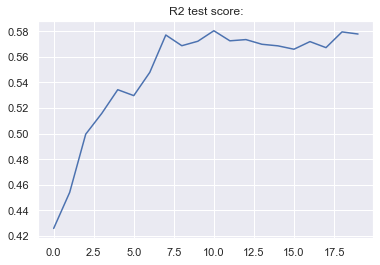

In [38]:
plt.plot(R2_0)
plt.title("R2 test score:")

In [39]:
print('Best R2 score is \t\t:', max(R2_0))
print('Most optimal value of K is \t:', R2_0.index(max(R2_0))+1)

Best R2 score is 		: 0.5804159984880813
Most optimal value of K is 	: 11


__train1__

In [68]:
print('KNN for train1:')

X1 = train1.copy()
X1.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y1 = train1['SalePrice'][:,None]

train_X1, test_X1, train_y1, test_y1 = train_test_split(X1,y1,test_size=0.2)

R2_1 = []

for K in range(20):
    K += 1
    
    knn = KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X1, train_y1)  #fit the model
    pred = knn.predict(test_X1) #make prediction on test set
    
    R2 = r2_score(test_y1, pred)
    R2_1.append(R2)
    print('R2 score for k = ' , K , 'is:', R2)

KNN for train1:
R2 score for k =  1 is: 0.7682683194303919
R2 score for k =  2 is: 0.7988445637099134
R2 score for k =  3 is: 0.8013307039179991
R2 score for k =  4 is: 0.8065935518984283
R2 score for k =  5 is: 0.8020475311244166
R2 score for k =  6 is: 0.7989690847057751
R2 score for k =  7 is: 0.8117374041185933
R2 score for k =  8 is: 0.8090963241863075
R2 score for k =  9 is: 0.802008643814124
R2 score for k =  10 is: 0.799063504559347
R2 score for k =  11 is: 0.7940099914388137
R2 score for k =  12 is: 0.7921427377427952
R2 score for k =  13 is: 0.7883323029086505
R2 score for k =  14 is: 0.792216863895279
R2 score for k =  15 is: 0.7927765233085566
R2 score for k =  16 is: 0.788752425017614
R2 score for k =  17 is: 0.7844053294761437
R2 score for k =  18 is: 0.7841133851701623
R2 score for k =  19 is: 0.7776833152196396
R2 score for k =  20 is: 0.7790725762683977


Text(0.5, 1.0, 'R2 test score:')

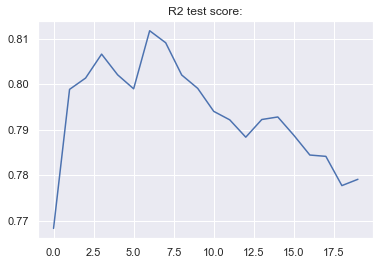

In [69]:
plt.plot(R2_1)
plt.title("R2 test score:")

In [70]:
print('Best R2 score is \t\t:', max(R2_1))
print('Most optimal value of K is \t:', R2_1.index(max(R2_1))+1)

Best R2 score is 		: 0.8117374041185933
Most optimal value of K is 	: 7
